In [111]:
import pandas as pd
from  sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [112]:
df = pd.read_csv("iris.csv")
encoder = LabelEncoder()
df['variety']= encoder.fit_transform(df['variety'])

In [113]:
# Remember to only have a binary value as output when u are using LogisticRegression
# or else your output will be rouge even tho is give a output it might be wrong
X = df[['petal.length']]
X.reset_index(drop=True)
Y = df[['variety']]
Y.reset_index(drop=True)
for x in range(len(Y['variety'])):
    print(Y['variety'][x])
    if Y['variety'][x] == 2:
        Y['variety'][x] = 1

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


/tmp/ipykernel_46805/1291632776.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Y['variety'][x] = 1
/tmp/ipykernel_46805/1291632776.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See t

In [114]:
X.shape

(150, 1)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


/home/remo/Documents/MLT_Shortworks/MLT_exp/1_EXPLORATORY_DATA_ANALYSIS/.conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
print(list(y_pred))
print(list(y_test['variety']))

[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0]


In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [119]:
b0 = model.intercept_
b1 = model.coef_[0]

print(b0,b1)

[-7.45642798] [2.77217238]


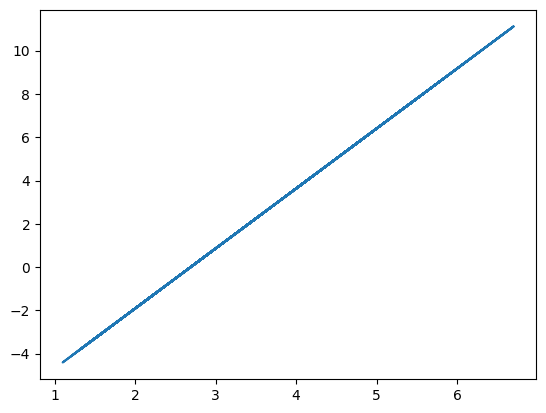

In [122]:

y = b1*X_train+b0
plt.plot(X_train,y)
plt.show()


In [123]:
from math import e
def sig(x):
    return 1 / (1 + e**(-x))

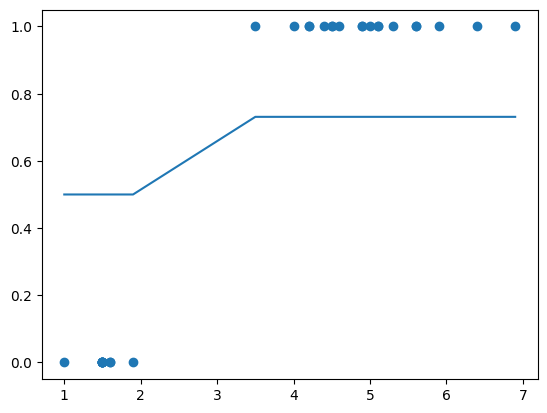

In [126]:
xd = X_test.sort_values(by="petal.length")
plt.scatter(xd['petal.length'], model.predict(xd))
plt.plot(xd['petal.length'], sig(model.predict(xd)))